In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("1976-2016-president.csv")

data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [2]:
data = data.drop(['state_po', 'state_fips', 'state_cen', 'state_ic',
                 'office', 'party', 'writein', 'totalvotes',
                 'version', 'notes'], axis=1)


In [3]:
data

,year,state,candidate,candidatevotes
0,1976,Alabama,"Carter, Jimmy",659170
1,1976,Alabama,"Ford, Gerald",504070
2,1976,Alabama,"Maddox, Lester",9198
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",6669
4,1976,Alabama,"Hall, Gus",1954
...,...,...,...,...
3735,2016,Wyoming,NaN,6904
3736,2016,Wyoming,NaN,3224
3737,2016,Wyoming,Blank Vote,2661
3738,2016,Wyoming,"Castle, Darrell L.",2042


In [4]:
data = data.loc[data['year'] == 2016]

In [5]:
data

,year,state,candidate,candidatevotes
3395,2016,Alabama,"Trump, Donald J.",1318255
3396,2016,Alabama,"Clinton, Hillary",729547
3397,2016,Alabama,"Johnson, Gary",44467
3398,2016,Alabama,NaN,21712
3399,2016,Alabama,"Stein, Jill",9391
...,...,...,...,...
3735,2016,Wyoming,NaN,6904
3736,2016,Wyoming,NaN,3224
3737,2016,Wyoming,Blank Vote,2661
3738,2016,Wyoming,"Castle, Darrell L.",2042


In [6]:
data.loc[data['candidate'] == 'Trump, Donald J.', 'Candidate'] = 'Trump'
data.loc[data['candidate'] == 'Clinton, Hillary', 'Candidate'] = 'Clinton'
data.loc[(data['candidate'] != 'Trump, Donald J.') & (data['candidate'] != 'Clinton, Hillary'), 'Candidate'] = 'Independent'
data

/Users/meganchang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/meganchang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,state,candidate,candidatevotes,Candidate
3395,2016,Alabama,"Trump, Donald J.",1318255,Trump
3396,2016,Alabama,"Clinton, Hillary",729547,Clinton
3397,2016,Alabama,"Johnson, Gary",44467,Independent
3398,2016,Alabama,NaN,21712,Independent
3399,2016,Alabama,"Stein, Jill",9391,Independent
...,...,...,...,...,...
3735,2016,Wyoming,NaN,6904,Independent
3736,2016,Wyoming,NaN,3224,Independent
3737,2016,Wyoming,Blank Vote,2661,Independent
3738,2016,Wyoming,"Castle, Darrell L.",2042,Independent


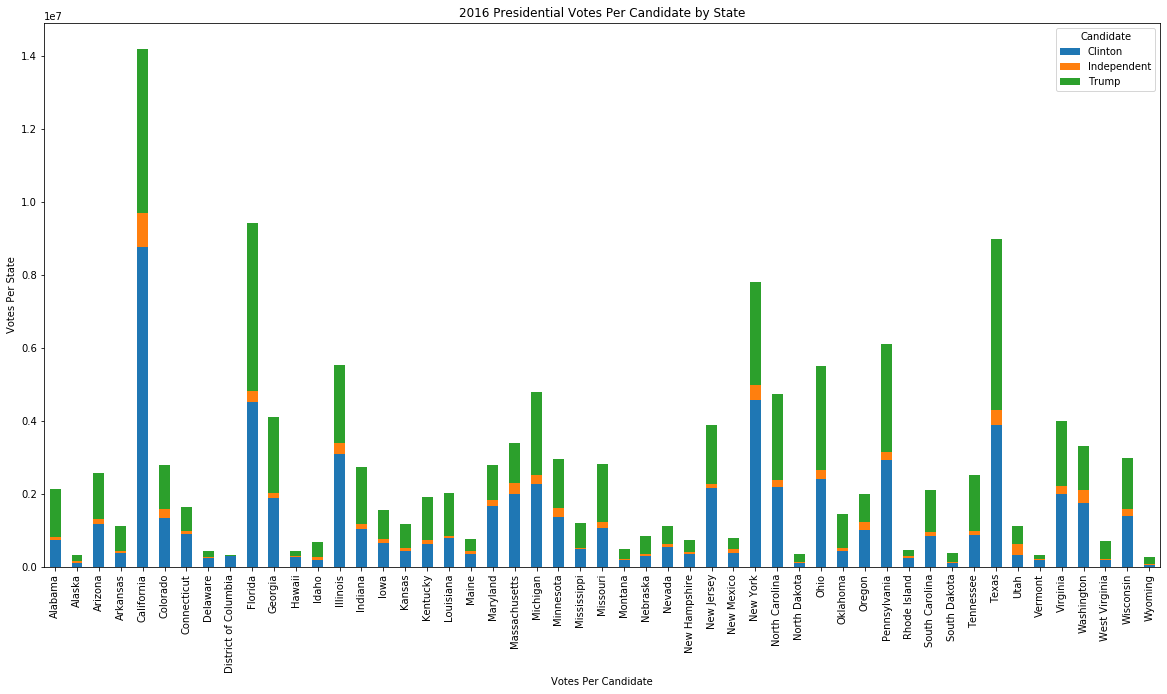

In [13]:
new_df = data.groupby(['state','Candidate'])['candidatevotes'].sum().unstack()
fig = new_df.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('2016 Presidential Votes Per Candidate by State')
plt.xlabel('Votes Per Candidate')
plt.ylabel('Votes Per State')
plt.savefig('plot.png')
##plt.show()